# Praca domowa 2 - Bartosz Rożek 298839

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import random
import matplotlib.pyplot as plt

## a)

In [2]:
lambda_ = 0.5

In [3]:
t = np.arange(0,10,0.1)

In [4]:
przyrosty = np.random.poisson(lam=lambda_ * np.array([t[i+1]-t[i] for i in range(len(t)-1)]), size=len(t)-1)

In [5]:
N = np.append(0, przyrosty)
N = np.cumsum(N)

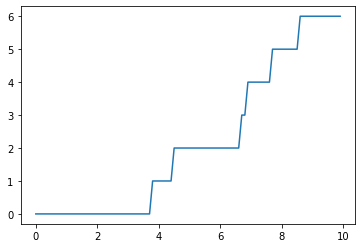

In [6]:
plt.plot(t,N)
plt.show()

## b)

### Pierwszy sposób

In [7]:
import time

In [8]:
def generate_wiener(t):
    N = [0]
    for i in range(1,len(t)):
        N.append(N[-1] + math.sqrt(t[i] - t[i-1]) * np.random.normal(0,1) )
    return N

0.010416030883789062


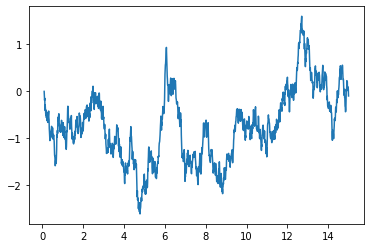

In [9]:
start = time.time()
t = np.arange(0.1,15,0.01)
N = generate_wiener(t)
end = time.time()
print(end-start)
plt.plot(t,N)
plt.show()

### Drugi sposób

In [10]:
from math import sqrt
def cholesky(A):
    n = len(A)

    L = [[0.0] * n for i in range(n)]

    for i in range(n):
        for k in range(i+1):
            tmp_sum = sum(L[i][j] * L[k][j] for j in range(k))
            
            if (i == k): 
                L[i][k] = sqrt(A[i][i] - tmp_sum)
            else:
                L[i][k] = (1.0 / L[k][k] * (A[i][k] - tmp_sum))
    return L

In [11]:
start = time.time()
n = len(t)
Sigma = []
for i in range(n):
    Sigma.append((np.append(t[:i] ,np.repeat(t[i], n-i))))
    
A = cholesky(Sigma)
X = np.random.normal(0,1, len(t))
N = A @ X
end = time.time()
print(end-start)

107.56631064414978


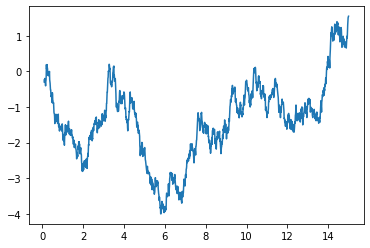

In [12]:
plt.plot(t,N)
plt.show()

Pierwsza metoda jest znacznie szybsza

## c)

In [13]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

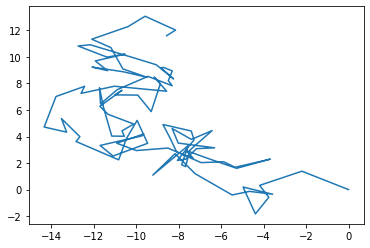

In [42]:
t = np.arange(0.1,100,1)
W1 = generate_wiener(t)
W2 = generate_wiener(t)
plt.plot(W1,W2)

Stadium końcowe

### Poniżej animacja przedstawiająca procesy dla kolejnych t.

In [43]:
fig, ax = plt.subplots()

ax.set_xlim(( min(W1), max(W1)))
ax.set_ylim((min(W2), max(W2)))

line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    line.set_data(W1[:i], W2[:i])
    return (line,)

plt.close(fig)
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(W1), interval=50, blit=True)

In [44]:
HTML(anim.to_html5_video())


## d)

In [28]:
def generate_cor_wiener(V1, rho):
    V2 = [rho*w1 + math.sqrt(1-rho**2)*w2 for w1,w2 in zip(W1,W2)]
    return V2

Text(0.5, 1.0, 'rho = 0.99')

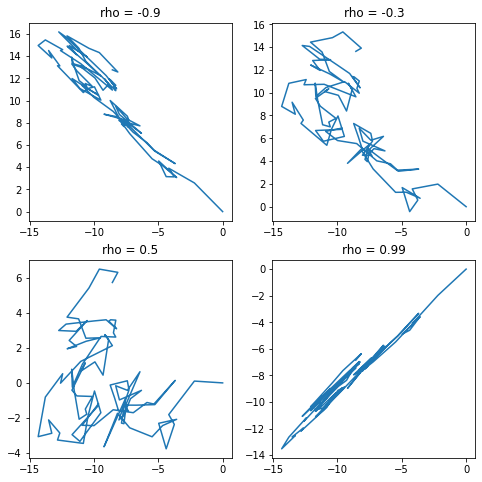

In [47]:
V1 = W1

fig = plt.figure(figsize=(8,8))

V2 = generate_cor_wiener(V1, rho = -0.9)

plt.subplot(2, 2, 1)
plt.plot(V1,V2)
plt.title('rho = -0.9')

V2 = generate_cor_wiener(V1, rho = -0.3)

plt.subplot(2, 2, 2)
plt.plot(V1,V2)
plt.title('rho = -0.3')

V2 = generate_cor_wiener(V1, rho = 0.5)

plt.subplot(2, 2, 3)
plt.plot(V1,V2)
plt.title('rho = 0.5')

V2 = generate_cor_wiener(V1, rho = 0.99)

plt.subplot(2, 2, 4)
plt.plot(V1,V2)
plt.title('rho = 0.99')


### Poniżej animacja przedstawiająca procesy dla kolejnych t dla rho=0.99

In [48]:
fig, ax = plt.subplots()

ax.set_xlim(( min(V1), max(V1)))
ax.set_ylim((min(V2), max(V2)))

line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    line.set_data(V1[:i], V2[:i])
    return (line,)

plt.close(fig)
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(V1), interval=50, blit=True)

In [49]:
HTML(anim.to_html5_video())

In [50]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=25, metadata=dict(artist='Me'), bitrate=1800)
anim.save('wiener_correlated.mp4', writer=writer)

## e)

Zbieżne z prawdopodobieństwem 1

In [20]:
def generate_x(n):
    X = []
    for i in range(1,n+1):
        p = np.random.uniform(0,1)
        if p<1/(2*(i+1)**(3/2)):
            X.append(i+1)
        elif p<1/(1*(i+1)**(3/2)):
            X.append(-i-1)
        else:
            X.append(0)
    return X

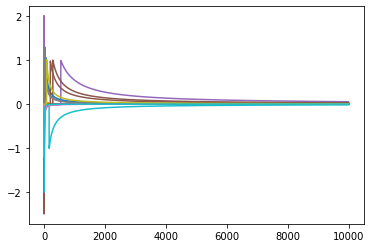

In [21]:
n=10000
for _ in range(20):
    X = generate_x(n)
    X = np.cumsum(X)
    X = [x/(i+1) for i,x in enumerate (X)]
    plt.plot(np.arange(1,n+1,1),X)
plt.show()

Zbieżne według prawdopodobieństwa

In [22]:
def generate_y(n):
    X = []
    for i in range(1,n+1):
        p = np.random.uniform(0,1)
        if p<1/(2*(i+1)*math.log(i+1)):
            X.append(i+1)
        elif p<1/(1*(i+1)*math.log(i+1)):
            X.append(-i-1)
        else:
            X.append(0)
    return X

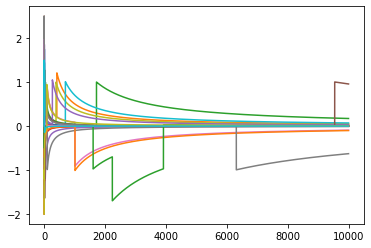

In [23]:
n=10000
for _ in range(20):
    Y = generate_y(n)
    Y = np.cumsum(Y)
    Y = [y/(i+1) for i,y in enumerate (Y)]
    plt.plot(np.arange(1,n+1,1),Y)
plt.show()

Niezbieżne

In [24]:
def generate_z(n):
    X = []
    for i in range(1,n+1):
        p = np.random.uniform(0,1)
        if p<1/(2*(i+1)):
            X.append(i+1)
        elif p<1/(1*(i+1)):
            X.append(-i-1)
        else:
            X.append(0)
    return X

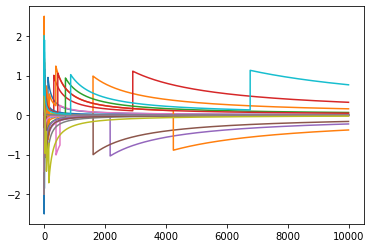

In [25]:
n=10000
for _ in range(20):
    Y = generate_y(n)
    Y = np.cumsum(Y)
    Y = [y/(i+1) for i,y in enumerate (Y)]
    plt.plot(np.arange(1,n+1,1),Y)
plt.show()

Patrząc na powyższe wykresy możemy zaobserwować dokładnie to o czym była mowa na zajęciach 

## f)

In [26]:
import warnings
warnings.filterwarnings('ignore')

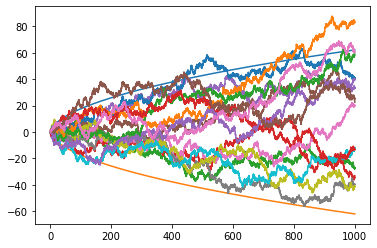

In [27]:
t = np.arange(1,1000,0.1)
plt.plot(t, np.sqrt(2*t*np.log(np.log(t))))
plt.plot(t, -np.sqrt(2*t*np.log(np.log(t))))
for _ in range(15):
    W = generate_wiener(t)
    plt.plot(t,W)
plt.show()

Jak widzimy, narysowane trajektorie "wypełniają" przestrzenie między krzywymi